### Group 4) Actions/Conversions
- [ ] What is the conversion rate (conversions/visitors)?
- [ ] What are the most common conversion paths?
- [ ] What is the average number of visits/steps required before a visitor converts?
- [ ] Is the recent tracking sufficient/fitting the purpose? Define possible Goals and check if the data contains the corresponding information.

In [2]:
from datetime import datetime
from pathlib import Path

import pandas as pd

ROOT_DIR = Path.cwd().parent.parent
DATA_DIR = ROOT_DIR / "data"
TRANSLATION_DIR = ROOT_DIR / "notebooks" / "diego" / "input" / "column_translation"

# list all files in the data directory
for file in list(DATA_DIR.iterdir()):
    if not file.name.endswith("#"):
        print(file.name)

Export _ Ausstiegsseiten _ 3. August 2022 – 20. März 2023.csv
stacked_df.csv
Export _  _ 3. August 2022 – 8. März 2023.csv
Export _ Einstiegsseiten _ 3. August 2022 – 20. März 2023.csv
Export _ Suchmaschinen _ 3. August 2022 – 20. März 2023.csv
Export _ Kanaltyp _ 3. August 2022 – 20. März 2023 (1).csv


In [3]:
df_exit_pages = pd.read_csv(
    DATA_DIR / "Export _ Ausstiegsseiten _ 3. August 2022 – 20. März 2023.csv",
    encoding="utf-16le",
)
df_exit_pages.name = "Exit Pages"
df_entry_pages = pd.read_csv(
    DATA_DIR / "Export _ Einstiegsseiten _ 3. August 2022 – 20. März 2023.csv",
    encoding="utf-16le",
)
df_entry_pages.name = "Entry Pages"
df_search_engines = pd.read_csv(
    DATA_DIR / "Export _ Suchmaschinen _ 3. August 2022 – 20. März 2023.csv",
    encoding="utf-16le",
)
df_search_engines.name = "Search Engines"
df_channel_type = pd.read_csv(
    DATA_DIR / "Export _ Kanaltyp _ 3. August 2022 – 20. März 2023 (1).csv",
    encoding="utf-16le",
)
df_channel_type.name = "Channel Type"
df_main_table = pd.read_csv(
    DATA_DIR / "Export _  _ 3. August 2022 – 8. März 2023.csv", encoding="utf-16le"
)
df_main_table.name = "Main Table"

df_exit_pages_column_translations = pd.read_csv(
    TRANSLATION_DIR / "exit_pages_columns_translation.csv", sep="\t"
)
df_entry_pages_column_translations = pd.read_csv(
    TRANSLATION_DIR / "entry_pages_columns_translation.csv", sep="\t"
)
df_search_engines_column_translations = pd.read_csv(
    TRANSLATION_DIR / "search_engines_columns_translation.csv", sep="\t"
)
df_channel_type_column_translations = pd.read_csv(
    TRANSLATION_DIR / "channel_type_columns_translation.csv", sep="\t"
)

# replace column names with translated ones
df_exit_pages.columns = df_exit_pages_column_translations["English"]
df_entry_pages.columns = df_entry_pages_column_translations["English"]
df_search_engines.columns = df_search_engines_column_translations["English"]
df_channel_type.columns = df_channel_type_column_translations["English"]

/tmp/ipykernel_10266/704195051.py:21: DtypeWarning: Columns (38,40,162,169,170,171,172,234,241,245,246,247,248,252,253,263,292,299,303,304,318,333,348,351,355,356,370,385,400,415,430,445,456,473,518,523,525,527,529,533,537,542,544,546,550,557,563,610,660,666,671,673,677,681,682,684,687,688,689,690,692,693,696,698,699,701,703,704,705,707,708,711,713,714,716,718,719,720,722,723,726,728,729,731,733,734,735,737,738,741,743,744,746,748,749,750,752,753,756,758,759,761,763,764,765,767,768,771,773,774,776,778,779,780,782,783,786,788,789,791,793,794,795,797,798,801,802,803,804,806,807,808,810,811,814,816,817,819,821,822,823,825,826,829,831,832,834,836,837,838,840,841,844,846,847,849,851,852,853,855,856,859,861,862,863,864,866,867,868,870,871,874,876,877,879,881,882,883,885,886,889,891,892,894,896,897,898,900,901,904,906,907,909,911,912,913,915,916,919,921,922,924,926,930,933,935,937,939,941,943,945,949,952,956,957,959,961,963,965,967,969,970,971,973,974,976,978,981,982,984,986,987,988,990,991,9

In [74]:
df_stacked = pd.read_csv(DATA_DIR / "stacked_df.csv")

/tmp/ipykernel_68488/3373380390.py:1: DtypeWarning: Columns (25,28,32,35,38,93,102,103,104,106,107,110,112,113,114,115,117,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stacked = pd.read_csv(DATA_DIR / "stacked_df.csv")


In [76]:
df_stacked.columns

Index(['idSite', 'idVisit', 'visitIp', 'visitorId', 'fingerprint',
       'type (actionDetails 0)', 'url (actionDetails 0)',
       'pageTitle (actionDetails 0)', 'pageIdAction (actionDetails 0)',
       'idpageview (actionDetails 0)',
       ...
       'Unnamed: 576', 'Unnamed: 577', 'Unnamed: 578', 'Unnamed: 579',
       'Unnamed: 580', 'Unnamed: 581', 'Unnamed: 582', 'Unnamed: 583',
       'Unnamed: 584', 'Unnamed: 585'],
      dtype='object', length=586)

In [46]:
# data cleaning, removing empty columns and columns with only one unique value
# remove empty columns https://www.geeksforgeeks.org/drop-empty-columns-in-pandas/
nan_value = float("NaN")
df_main_table.replace("", nan_value, inplace=True)
df_main_table.dropna(how="all", axis=1, inplace=True)

# remove columns with only one unique value
df_main_table = df_main_table.loc[:, df_main_table.apply(pd.Series.nunique) != 1]

print(len(df_main_table.columns))

848


In [30]:
df_main_table.columns

Index(['idVisit', 'visitIp', 'visitorId', 'fingerprint',
       'type (actionDetails 0)', 'url (actionDetails 0)',
       'pageTitle (actionDetails 0)', 'pageIdAction (actionDetails 0)',
       'idpageview (actionDetails 0)', 'serverTimePretty (actionDetails 0)',
       ...
       'idpageview (actionDetails 53)', 'serverTimePretty (actionDetails 53)',
       'pageId (actionDetails 53)', 'timeSpent (actionDetails 53)',
       'timeSpentPretty (actionDetails 53)',
       'pageviewPosition (actionDetails 53)', 'subtitle (actionDetails 53)',
       'timestamp (actionDetails 53)', 'pageLoadTime (actionDetails 24)',
       'pageLoadTimeMilliseconds (actionDetails 24)'],
      dtype='object', length=848)

In [48]:
df_main_table_unpivot = pd.melt(
    df_main_table,
    id_vars=["idVisit", "visitIp", "visitorId", "fingerprint"],
    value_vars=[
        col
        for col in df_main_table.columns
        if col not in ["idVisit", "visitIp", "visitorId", "fingerprint"]
    ],
)
df_main_table_unpivot.dropna(subset=["value"], inplace=True)
# df_main_table_unpivot.to_csv("output/main_table_unpivot.csv", index=False)

In [50]:
### Group 4) Actions/Conversions
# - [ ] What is the conversion rate (conversions/visitors)?
# - [ ] What are the most common conversion paths?
# - [ ] What is the average number of visits/steps required before a visitor converts?
# - [ ] Is the recent tracking sufficient/fitting the purpose? Define possible Goals and check if the data contains the corresponding information.

In [86]:
# Bounce rate
bounce_rate = df_main_table["url (actionDetails 1)"].isna().sum() / len(df_main_table)
print(f"Bounce rate: {bounce_rate:.2%}")

Bounce rate: 43.49%


In [94]:
# action / outlink
df_main_table["type (actionDetails 10)"].value_counts()

action     81
outlink     6
Name: type (actionDetails 10), dtype: int64

In [97]:
type_columns = [
    "type (actionDetails 0)",
    "type (actionDetails 1)",
    "type (actionDetails 2)",
    "type (actionDetails 3)",
    "type (actionDetails 4)",
    "type (actionDetails 5)",
    "type (actionDetails 6)",
    "type (actionDetails 7)",
    "type (actionDetails 8)",
    "type (actionDetails 9)",
    "type (actionDetails 10)",
    "type (actionDetails 11)",
    "type (actionDetails 12)",
    "type (actionDetails 13)",
    "type (actionDetails 14)",
    "type (actionDetails 15)",
    "type (actionDetails 16)",
    "type (actionDetails 17)",
    "type (actionDetails 18)",
    "type (actionDetails 19)",
    "type (actionDetails 20)",
    "type (actionDetails 21)",
    "type (actionDetails 22)",
    "type (actionDetails 23)",
    "type (actionDetails 24)",
    "type (actionDetails 25)",
    "type (actionDetails 26)",
    "type (actionDetails 27)",
    "type (actionDetails 28)",
    "type (actionDetails 29)",
    "type (actionDetails 30)",
    "type (actionDetails 31)",
    "type (actionDetails 32)",
    "type (actionDetails 33)",
    "type (actionDetails 34)",
    "type (actionDetails 35)",
    "type (actionDetails 36)",
    "type (actionDetails 37)",
    "type (actionDetails 38)",
    "type (actionDetails 39)",
    "type (actionDetails 40)",
    "type (actionDetails 41)",
    "type (actionDetails 42)",
    "type (actionDetails 43)",
    "type (actionDetails 44)",
    "type (actionDetails 45)",
    "type (actionDetails 46)",
    "type (actionDetails 47)",
    "type (actionDetails 48)",
    "type (actionDetails 49)",
    "type (actionDetails 50)",
    "type (actionDetails 51)",
    "type (actionDetails 52)",
    "type (actionDetails 53)",
    "type (actionDetails 54)",
    "type (actionDetails 55)",
    "type (actionDetails 56)",
    "type (actionDetails 57)",
    "type (actionDetails 58)",
    "type (actionDetails 59)",
    "type (actionDetails 60)",
    "type (actionDetails 61)",
    "type (actionDetails 62)",
    "type (actionDetails 63)",
    "type (actionDetails 64)",
    "type (actionDetails 65)",
    "type (actionDetails 66)",
    "type (actionDetails 67)",
    "type (actionDetails 68)",
    "type (actionDetails 69)",
    "type (actionDetails 70)",
    "type (actionDetails 71)",
    "type (actionDetails 72)",
    "type (actionDetails 73)",
    "type (actionDetails 74)",
    "type (actionDetails 75)",
]

In [101]:
df_main_table_unpivot[
    df_main_table_unpivot.variable.isin(type_columns)
].value.value_counts()

action      4816
outlink      498
goal         350
download       8
Name: value, dtype: int64

In [112]:
# Target conversion
print(f"Target conversion for outlinks: {498.0 / (4816 + 498 + 350 + 8):.2%}")
print(
    f"Target conversion over unique users for outlinks: {498.0 / (len(df_main_table)):.2%}"
)

Target conversion for outlinks: 8.78%
Target conversion over unique users for outlinks: 30.46%


In [124]:
df_main_table["timestamp (actionDetails 0)"].map(lambda x: datetime.utcfromtimestamp(x))

0      2023-03-08 14:34:33
1      2023-03-08 14:26:06
2      2023-03-08 12:58:09
3      2023-03-08 12:41:39
4      2023-03-08 12:06:02
               ...        
1630   2022-08-04 08:46:52
1631   2022-08-04 08:49:57
1632   2022-08-04 08:37:44
1633   2022-08-04 08:08:39
1634   2022-08-04 08:35:12
Name: timestamp (actionDetails 0), Length: 1635, dtype: datetime64[ns]

array([[<AxesSubplot: title={'center': 'actions'}>]], dtype=object)

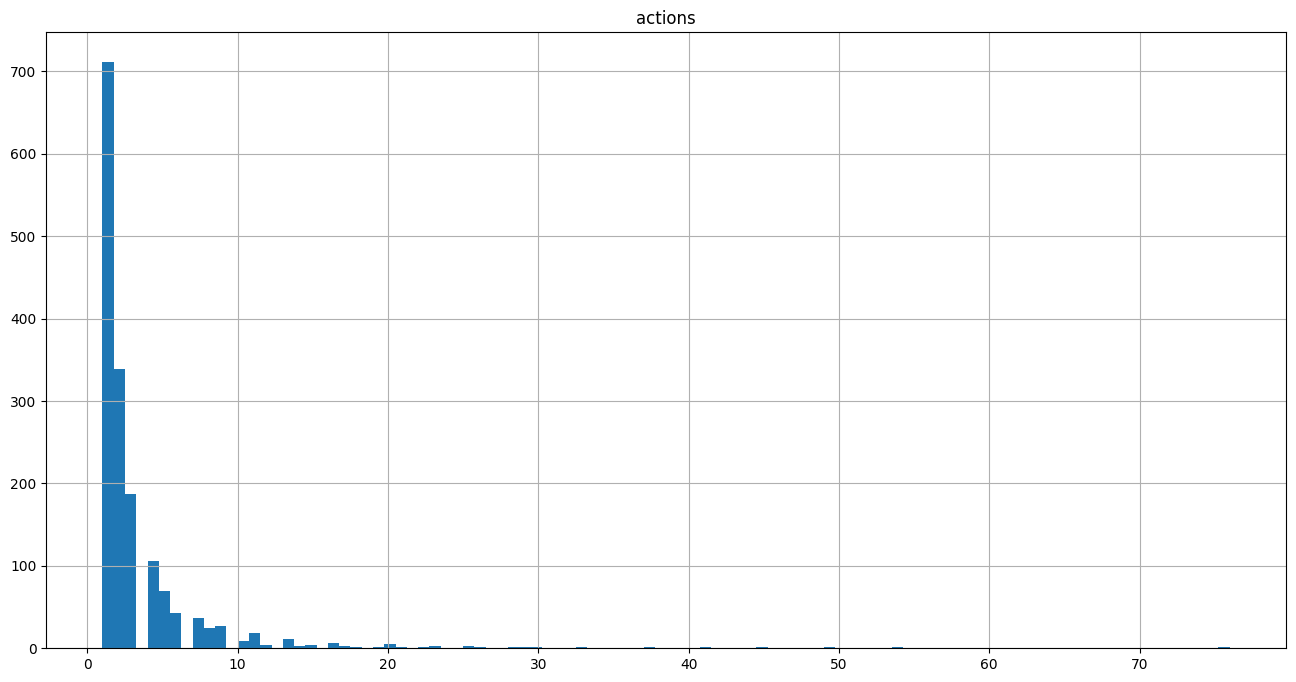

In [141]:
# Exit rate
df_main_table[["actions"]].hist(bins=100, figsize=(16, 8))

goalConversions
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: visitServerHour, dtype: object

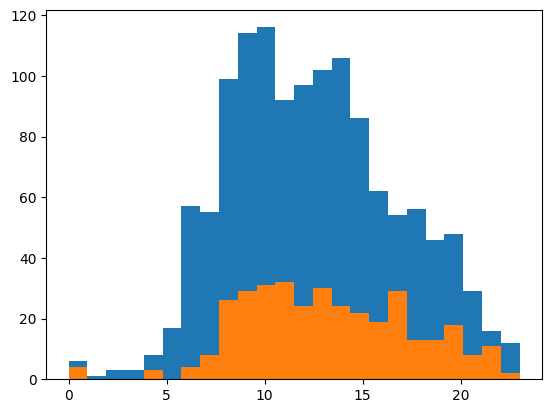

In [7]:
# df_main_table["goalConversions"].value_counts()
# time histogram title hour
# df_main_table["visitServerHour"].hist(bins=24, grid=False)
df_main_table.groupby("goalConversions")["visitServerHour"].hist(bins=24, grid=False)
# df_main_table.groupby("goalConversions")["visitDuration"].hist(grid=False)

In [ ]:
df_main_table.groupby("goalConversions")["visitServerHour"].hist(bins=24, grid=False)

In [165]:
def check_column_name_for_url(text):
    for col in df_main_table.columns:
        if text in col:
            # if col.startswith(text):
            print(col)


check_column_name_for_url("timestamp")

timestamp (actionDetails 0)
timestamp (actionDetails 1)
timestamp (actionDetails 2)
timestamp (actionDetails 3)
timestamp (actionDetails 4)
timestamp (actionDetails 5)
timestamp (actionDetails 6)
timestamp (actionDetails 7)
timestamp (actionDetails 8)
timestamp (actionDetails 9)
timestamp (actionDetails 10)
timestamp (actionDetails 11)
timestamp (actionDetails 12)
timestamp (actionDetails 13)
timestamp (actionDetails 14)
timestamp (actionDetails 15)
timestamp (actionDetails 16)
timestamp (actionDetails 17)
timestamp (actionDetails 18)
timestamp (actionDetails 19)
timestamp (actionDetails 20)
timestamp (actionDetails 21)
timestamp (actionDetails 22)
timestamp (actionDetails 23)
timestamp (actionDetails 24)
timestamp (actionDetails 25)
timestamp (actionDetails 26)
timestamp (actionDetails 27)
timestamp (actionDetails 28)
timestamp (actionDetails 29)
timestamp (actionDetails 30)
timestamp (actionDetails 31)
timestamp (actionDetails 32)
timestamp (actionDetails 33)
timestamp (actionDetails

In [125]:
df_main_table_unpivot.variable.value_counts()

idSite                                         1635
deviceType                                     1635
browserFamilyDescription                       1635
operatingSystemCode                            1635
operatingSystemIcon                            1635
                                               ... 
iconSVG (actionDetails 59)                        1
subtitle (actionDetails 59)                       1
title (actionDetails 59)                          1
pageviewPosition (actionDetails 59)               1
pageLoadTimeMilliseconds (actionDetails 28)       1
Name: variable, Length: 1327, dtype: int64

In [58]:
# 	user_id	event	timestamp
# 0	219483890	catalog	2019-11-01 17:59:13.273932
# 1	219483890	product1	2019-11-01 17:59:28.459271
# 2	219483890	cart	2019-11-01 17:59:29.502214
# 3	219483890	catalog	2019-11-01 17:59:32.557029
# 4	964964743	catalog	2019-11-01 21:38:19.283663

In [ ]:
df_main_table_unpivot[["visitorId"]]

In [64]:
df_main_table_unpivot[
    df_main_table_unpivot["variable"] == "timeSpentPretty (actionDetails 22)"
].head()

,idVisit,visitIp,visitorId,fingerprint,variable,value
760275,1635,0.0.0.0,1325bd43708ce745,c7465bb30019e4f9,timeSpentPretty (actionDetails 22),NaN
760276,1634,::,ef8c93d3bd689104,3b2f0cac92457fd0,timeSpentPretty (actionDetails 22),NaN
760277,1633,::,43f301f12b51690d,4742bf283a30b8e1,timeSpentPretty (actionDetails 22),NaN
760278,1632,::,22255a94de0ad88e,7dae42ba27e15a9e,timeSpentPretty (actionDetails 22),NaN
760279,1631,0.0.0.0,c9fa4e83991b6db7,abd8a6662a2e68d6,timeSpentPretty (actionDetails 22),NaN


In [68]:
df_main_table_unpivot.dropna(subset=["value"], inplace=True)

In [71]:
# df_main_table_unpivot.to_csv("output/main_table_unpivot.csv", index=False, encoding="utf-8")